In [4]:
from turtle import pos
from unittest.result import failfast
import yahoo_fin.stock_info as ys
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import utils
import yfinance as yf
from dateutil import relativedelta
import numpy as np
import math
import pickle
import os


In [5]:
data = {"general": {"fiat": 0},
        "seasonal": {"fiat": 0}}
timeline = {"general": {"date": [], "value": []},
            "seasonal": {"date": [], "value": []}}


In [6]:

def download_data(all_symbols, starting_date):
    """
    Downloads all the data for all the symbols and saves it in a pickle file
    For each symbol, the data is saved in a seperate pickle file, e.g. "AAPL_20180101.pickle"
    """
    
    # loop trough all files in data folder with the ending .pickle
    for file in os.listdir("data"):
        if file.endswith(".pickle"):
            # get the name of the symbol
            symbol = file.split("_")[0]

            # remove the symbol from the list if exists and the date is earlier then the available data
            if symbol in all_symbols:
                start_date = int(file.split("_")[1].replace(".pickle", ""))
            
                # check if the date is older then the available data
                if int(starting_date.strftime("%Y%m%d")) > start_date:
                    all_symbols.remove(symbol)
                    print("Data for " + symbol + " already exists, skipping it")
                else:
                    print("Incomplete data for " + symbol + " already exists, removing the file")
                    # remove the file
                    os.remove("data/" + file)
    
    for symbol in all_symbols:
        # get the data
        data = yf.download(symbol, starting_date, datetime.date.today(), progress=False)
        data = data["Adj Close"]
        print(data)
        data.to_pickle("data/" + symbol + "_" + str(starting_date.strftime("%Y%m%d")) + ".pickle")


In [7]:

  
def get_index(index):
    """
    Gets all the positions for a given index, e.g. the S&P500
    """
    
    if index == "sp500":
        # symbols = ys.tickers_sp500()
        # weights = [6.830975, 5.280989, 3.071185, 1.872211, 1.726786, 1.634329, 1.582618, 1.550504, 1.414743, 1.399758, 1.14108, 1.043067, 1.030311, 1.000476, 0.98467, 0.934172, 0.877567, 0.850936, 0.84754, 0.802483, 0.789868, 0.783875, 0.770773, 0.723783, 0.697547, 0.68757, 0.627069, 0.610301, 0.609607, 0.595208, 0.575025, 0.574837, 0.550446, 0.54129, 0.53063, 0.507774, 0.503977, 0.497954, 0.496886, 0.474995, 0.466157, 0.463543, 0.456848, 0.447756, 0.446874, 0.440117, 0.4339, 0.423721, 0.413796, 0.412795, 0.402663, 0.401228, 0.398916, 0.386941, 0.382528, 0.381014, 0.380503, 0.38044, 0.371419, 0.369113, 0.359628, 0.357643, 0.356857, 0.355428, 0.350098, 0.348309, 0.342742, 0.340088, 0.337781, 0.33719, 0.318604, 0.31628, 0.305818, 0.305135, 0.304937, 0.301977, 0.295904, 0.289176, 0.275571, 0.275045, 0.27498, 0.270946, 0.270348, 0.264637, 0.263187, 0.262513, 0.259701, 0.258402, 0.255696, 0.246159, 0.243879, 0.243185, 0.242852, 0.242116, 0.241938, 0.240274, 0.235345, 0.230805, 0.228643, 0.227858, 0.227681, 0.22672, 0.220946, 0.218448, 0.216563, 0.214651, 0.211852, 0.206322, 0.206098, 0.198308, 0.19756, 0.193, 0.192842, 0.191263, 0.186138, 0.185968, 0.185276, 0.182644, 0.182633, 0.182163, 0.180074, 0.179709, 0.17786, 0.177151, 0.175331, 0.174386, 0.174323, 0.173406, 0.172765, 0.172125, 0.16746, 0.167421, 0.166777, 0.166592, 0.165045, 0.164155, 0.163585, 0.162115, 0.161347, 0.160497, 0.158975, 0.158106, 0.157973, 0.157429, 0.156714, 0.155283, 0.153972, 0.151876, 0.151549, 0.150223, 0.14902, 0.148766, 0.148046, 0.147678, 0.147129, 0.146925, 0.146574, 0.146358, 0.143178, 0.139544, 0.137969, 0.136932, 0.136891, 0.133917, 0.133388, 0.132169, 0.131788, 0.129836, 0.12959, 0.128755, 0.128021, 0.1279, 0.127294, 0.127156, 0.126969, 0.126519, 0.124197, 0.123873, 0.123799, 0.123139, 0.122542, 0.122418, 0.119018, 0.118979, 0.118742, 0.118277, 0.118059, 0.118037, 0.116878, 0.11685, 0.11675, 0.11664, 0.115078, 0.11497, 0.114922, 0.114833, 0.114595, 0.11343, 0.113348, 0.11287, 0.112715, 0.111497, 0.11149, 0.110905, 0.110296, 0.108292, 0.10763, 0.107389, 0.106908, 0.106578, 0.105631, 0.105584, 0.105444, 0.105423, 0.105222, 0.103562, 0.10337, 0.103071, 0.102209, 0.101443, 0.101364, 0.101285, 0.10125, 0.101221, 0.101035, 0.100592, 0.099671, 0.09753, 0.09576, 0.094872, 0.094671, 0.093962, 0.093367, 0.093011, 0.092689, 0.092498, 0.091784, 0.091735, 0.090974, 0.089757, 0.089226, 0.088896, 0.088586, 0.088274, 0.088058, 0.087812, 0.087797, 0.086867, 0.086821, 0.086689, 0.08656, 0.086455, 0.085685, 0.08549, 0.085198, 0.084697, 0.083766, 0.082824, 0.082558, 0.081335, 0.080862, 0.079879, 0.079316, 0.077602, 0.077439, 0.076388, 0.076117, 0.07608, 0.075945, 0.07575, 0.075707, 0.075376, 0.075101, 0.074979, 0.074886, 0.074882, 0.074803, 0.074546, 0.07417, 0.07384, 0.072229, 0.072157, 0.071977, 0.07124, 0.070964, 0.070887, 0.070515, 0.069436, 0.069038, 0.06868, 0.068447, 0.06758, 0.066857, 0.066623, 0.066617, 0.066569, 0.066539, 0.065771, 0.065675, 0.065633, 0.065606, 0.06548, 0.06528, 0.064685, 0.064646, 0.064277, 0.064168, 0.064062, 0.063964, 0.06387, 0.063412, 0.063348, 0.063213, 0.062876, 0.062147, 0.061839, 0.061578, 0.061509, 0.061154, 0.061013, 0.060257, 0.059905, 0.05989, 0.059566, 0.059237, 0.058436, 0.05793, 0.057793, 0.057105, 0.057074, 0.056921, 0.05628, 0.056133, 0.055025, 0.054961, 0.054635, 0.054431, 0.054252, 0.054191, 0.053939, 0.053419, 0.053345, 0.053233, 0.0532, 0.053014, 0.052816, 0.052724, 0.05215, 0.051903, 0.051849, 0.051259, 0.051203, 0.050951, 0.050679, 0.049861, 0.049754, 0.049709, 0.049291, 0.049165, 0.047955, 0.047952, 0.046933, 0.046816, 0.046689, 0.046669, 0.046177, 0.046029, 0.045753, 0.045385, 0.045378, 0.045354, 0.045116, 0.04489, 0.044863, 0.044726, 0.04465, 0.044622, 0.044565, 0.044136, 0.043523, 0.043228, 0.043212, 0.043043, 0.042803, 0.042671, 0.042433, 0.042297, 0.042279, 0.042007, 0.041657, 0.041644, 0.041529, 0.04144, 0.041317, 0.041293, 0.041058, 0.041052, 0.040937, 0.040752, 0.040219, 0.039691, 0.039688, 0.039507, 0.03946, 0.039331, 0.039149, 0.038515, 0.03826, 0.038142, 0.038112, 0.038062, 0.037826, 0.037731, 0.037678, 0.037617, 0.037476, 0.037281, 0.037252, 0.03722, 0.036968, 0.036893, 0.03655, 0.036417, 0.036005, 0.035983, 0.035929, 0.035638, 0.035574, 0.035186, 0.035086, 0.035038, 0.034699, 0.034386, 0.033404, 0.032777, 0.032527, 0.032448, 0.032413, 0.032302, 0.032127, 0.032086, 0.031543, 0.031288, 0.031209, 0.030608, 0.030561, 0.030487, 0.030302, 0.029862, 0.029521, 0.029287, 0.029044, 0.029015, 0.029007, 0.028726, 0.028701, 0.028389, 0.027988, 0.027959, 0.027658, 0.027589, 0.027508, 0.027479, 0.027423, 0.026996, 0.026765, 0.026311, 0.025965, 0.025959, 0.025741, 0.025654, 0.025378, 0.024948, 0.023936, 0.023754, 0.023738, 0.023607, 0.023501, 0.023434, 0.023361, 0.022004, 0.021865, 0.021544, 0.02138, 0.021206, 0.021045, 0.020657, 0.020642, 0.020626, 0.020481, 0.020409, 0.019956, 0.019875, 0.018478, 0.018294, 0.016845, 0.016772, 0.015778, 0.012309, 0.012176, 0.011731, 0.01138, 0.006474]
        symbols = ['SNP']
        
    elif index == "sp500-consumer":
        symbols = ["AMZN", "TSLA", "HD", "MCD", "NKE", "LOW", "SBUX", "TJX", "BKNG", "TGT", "DG", "ORLY", "GM", "MAR", "AZO", "F", "ROST", "CMG", "LVS", "YUM", "HLT", "DLTR", "DHI", "LEN", "GPC", "APTV", "TSCO", "ULTA", "EBAY", "BBY", "GRMN", "DRI", "ETSY", "NVR", "LKQ", "EXPE", "MGM", "DPZ", "RCL", "POOL", "VFC", "PHM", "BBWI", "WYNN", "KMX", "BWA", "TPR", "CZR", "AAP", "CCL", "HAS", "WHR", "RL", "MHK", "NWL", "NCLH", "WMT", "PG", "KO", "PEP", "COST", "PM", "MDLZ", "EL", "MO", "CL", "MNST", "ADM", "KDP", "GIS", "KHC", "HSY", "KMB", "SYY", "STZ", "WBA", "KR", "BF.B", "HRL", "K", "MKC", "TSN", "CHD", "CAG", "CLX", "CPB", "SJM", "LW", "TAP"]
        
    elif index == "dowjones":
        symbols = ['DIA']
        
    elif index == "dowjones-consumer":
        symbols = ['HD', 'KO', 'MCD', 'NKE', 'PG', 'WMT']
        #symbols = ys.tickers_dow()
        """
        # get symbols from type Cunsumer Goods
        consumer_symbols = []
        for symbol in symbols:
            info = ys.get_company_info(symbol)
            sector = info["Value"]["sector"]
            #print(symbol, sector)

            if "Consumer" in sector:
                consumer_symbols.append(symbol)
                
        print(consumer_symbols)
        """
        
    return symbols


In [8]:
def get_stock_type(symbol):
    """
    returns the category of a given stock symbol
    """
    info = ys.get_company_info(symbol)
    sector = info["Value"]["sector"]
    return sector



In [9]:

def get_price_for_symbol(symbol, date=None):
    
    """
    Given a stock symbol and an optional date, return the price of that stock
    If no date is defined, the method returns the current price
    """ 
    
    # no date defined, get current price 
    if date is None:
        date = datetime.datetime.today() - datetime.timedelta(days=1)
        
    # load the pickle file for the symbol
    # loop through all files in the folder data
    for file in os.listdir("data"):
        # if filename starts with the symbol, load the file
        if file.startswith(symbol + "_"):
            # get the start date of the file
            start_date = int(file.split("_")[1].replace(".pickle", ""))
            
            # check if the date is earlier then the available data
            if int(date.strftime("%Y%m%d")) < start_date:
                print("Error: Date is earlier then the available data.")
                
                # this should not happen, but if it does, stop the script
                exit(0)
            
            # open the file for reading
            file = open("data/" + file, "rb")

            # dump information to that file
            data = pickle.load(file)

            # close the file
            file.close()
            break
    
    # get the value for the given date, keeping in mind not every day is a trading day
    prices = []
    
    # loop trough the 10 days before the given date
    for i in range(10):
        date_t = date + datetime.timedelta(days=i-9)
        
        # check if the date is in the data
        if date_t.strftime("%Y-%m-%d") in data:
            prices.append(data[date_t.strftime("%Y-%m-%d")])
    
    # get the last available price
    result = prices[-1]

    return result

In [10]:


def buy_position(portfolio, symbol, amount_fiat, date):
    """
    Buys a stock and adds it to the portfolio
    """
    # TODO no fractional shares
    
    
    # check if enough fiat to buy
    fiat_portfolio = data[portfolio]["fiat"]
    if amount_fiat > fiat_portfolio:
        print("Error: There is not enough fiat money in the portfolio. Unable to buy postion.")
        return 0
    
    # get price
    price = get_price_for_symbol(symbol, date=date)

    # calcualte stock amount (fractional shares possible in this work)
    amount_stock = amount_fiat / price
    
    # deduct fiat amount from fiat portfolio
    data[portfolio]["fiat"] = fiat_portfolio - amount_fiat

    # add to the portfolio
    data[portfolio][symbol] = amount_stock
    



In [11]:

def sell_position(portfolio, symbol, date=None):
    """
    Sells a stock and adds it to the portfolio
    """
    
    fiat_portfolio = data[portfolio]["fiat"]
    
    # check if position in portfolio
    if symbol not in data[portfolio]:
        print("Error: There is no existing position for {symbol}. Unable to sell postion.")
        return 0
    
    # get price
    price = get_price_for_symbol(symbol, date=date)

    # calcualte stock amount (fractional shares possible in this work)
    amount_fiat =  data[portfolio][symbol] * price
    
    # remove from the portfolio
    del data[portfolio][symbol]
    
    # add fiat amount from fiat portfolio
    data[portfolio]["fiat"] = fiat_portfolio + amount_fiat

    

 

In [12]:

def liquidate_postions(portfolio, date=None):
    """Liquidates all open positions

    Args:
        portfolio (string): name of the portfolio
        date (datetime, optional): date on which the postions are liquidated. Defaults to None.

    Returns:
        float: Amount of fiat money in the portfolio after liquidation
    
    """
    
    # loop through postions
    for position in list(data[portfolio]):
        # sell all positons (not fiat)
        if position != "fiat":
            sell_position(portfolio, position, date=date)
    
    return data[portfolio]["fiat"]


In [13]:
 
def buy_into_positions(portfolio, symbols, date):
    """
    Liquidates all existing positions and buys the given amount for every symbol
    """
    
    # Liquidate all open positions
    fiat_amount = liquidate_postions(portfolio, date=date)
    
    # TODO: different weights for each symbol?
    
    amounts_fiat = [math.floor(fiat_amount / len(symbols))] * len(symbols)
    
    # for every symbol, buy the coresponding amount
    for i in range(len(symbols)):
        buy_position(portfolio, symbols[i], amounts_fiat[i], date=date)
    


In [14]:

def calculate_portfolio_value(portfolio, date):
    """
    calculates the portfolio value
    """
    
    portfolio_amount = 0
        
    # for every positon in portfolio
    for position in data[portfolio]:
        if position != "fiat":
            # get price
            price = get_price_for_symbol(position, date=date)
            
            # calcualte stock amount (fractional shares possible in this work)
            amount_fiat =  data[portfolio][position] * price
            
            # add to portfolio amount
            portfolio_amount += amount_fiat
    
    # add fiat amount
    portfolio_amount += data[portfolio]["fiat"]
    
    return portfolio_amount

Starting...
Data for DIA already exists, skipping it
Data for HD already exists, skipping it
Data for KO already exists, skipping it
Data for MCD already exists, skipping it
Data for NKE already exists, skipping it
Data for PG already exists, skipping it
Data for WMT already exists, skipping it
Start investing...: [----------------------------------------#######################################

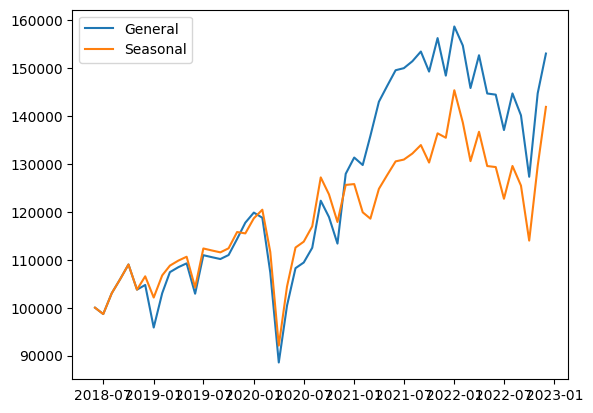

In [15]:
print("Starting...")

# changes holdings only two times in the year
# be in the consumer markets (from November to March)
# be in the general market the rest of the time
# therefore positions are changing in November and March
    
# initalize the portfolio
starting_date =  datetime.date(2018, 6, 1)
ending_date = datetime.date.today() # datetime.date(2022, 5, 1)
current_date = starting_date

inital_portfolio_value = 100000 # 100k USD
data["general"]["fiat"] = inital_portfolio_value
data["seasonal"]["fiat"] = inital_portfolio_value
    
# Download data for all symbols beforehand and pickle it
all_symbols = get_index("dowjones")
all_symbols.extend(get_index("dowjones-consumer"))
download_data(all_symbols, starting_date)

# buy_into_positions("general", ["AMZN", "GOOG"], date=current_date)
# buy_into_positions("seasonal", ["AAPL", "MSFT"], date=current_date)

# TODO: check if date in consumer markets or general

# buy into the general market
symbols = get_index("dowjones")
buy_into_positions("general", symbols, date=current_date)
buy_into_positions("seasonal", symbols, date=current_date)

# Start progress bar
utils.start_progress("Start investing...")

# loop through all days until ending date is reached (start with for each month)
while current_date < ending_date:
    num = utils.datetime_to_int(current_date) - utils.datetime_to_int(starting_date)
    all = utils.datetime_to_int(ending_date) - utils.datetime_to_int(starting_date)
    utils.progress(num / all * 100)

    # if date = 1. November
    if current_date.month == 11 and current_date.day == 1:
        # buy into the consumer markets postions
        # TODO buy_into_positions
        symbols = get_index("dowjones-consumer")
        buy_into_positions("seasonal", symbols, date=current_date)

    # if date = 1. March
    if current_date.month == 3 and current_date.day == 1:
        # buy into the general market
        symbols = get_index("dowjones")
        buy_into_positions("seasonal", symbols, date=current_date)
    
    # if 1st of the month
    if current_date.day == 1:
        # calculate current portfolio value and save it
        # get general portfolio value
        general = calculate_portfolio_value("general", date=current_date)
        timeline["general"]["date"].append(current_date)
        timeline["general"]["value"].append(general)

        seasonal = calculate_portfolio_value("seasonal", date=current_date)
        timeline["seasonal"]["date"].append(current_date)
        timeline["seasonal"]["value"].append(seasonal)
        
    # current_date plus one day
    # current_date = current_date + datetime.timedelta(days=1)
    
    # jump to next month
    current_date = current_date + relativedelta.relativedelta(months=1, day=1)

# visualize the timeline and the portfolio value

# plot
fig, ax = plt.subplots()

ax.plot(timeline["general"]["date"], timeline["general"]["value"], label = "General")
ax.plot(timeline["seasonal"]["date"], timeline["seasonal"]["value"], label = "Seasonal")
plt.legend()
#ax.plot(timeline["general"]["date"], timeline["general"]["value"], linewidth=2.0)

plt.show()